In [3]:
from package.formatcalculator import FormatCalculator
import pandas as pd
import itertools

# reads df from csv
df = pd.read_csv("testdata.csv")

# that extracts formats from dataframe
format_hashed_df = FormatCalculator.hash_df_formats(df)

# get Unique formats from data
unique_data = FormatCalculator.get_unique_hashes_from_df_columnwise(format_hashed_df)
# optimised lists of unique data formats
final_formatted_data = []
for x in list(unique_data):
    final_formatted_data.append((x[0], x[1]))
# unique lables for data visualisation purposes
unique_lables = [x[0] for x in final_formatted_data]
getting_unique_label_data = [x[1] for x in final_formatted_data]
# unique lables data format for all data format types in dataset
sub_lables_unique_lables = (
    pd.Series(list(itertools.chain(*getting_unique_label_data))).unique().tolist()
)

In [4]:
col = []
for ss,x in enumerate(df.columns.to_list()):
    sub_lables = [
        {x: [0 for z in range(len(unique_lables))]} for x in sub_lables_unique_lables
    ]
    values = df[x].values.tolist()
    for z in sub_lables_unique_lables:
        for xs in values:
            import re
            if re.compile(z).match(str(xs).strip()):
                sub = [i for i, d in enumerate(sub_lables) if list(d.keys())[0] == z][0]
                sub_lables[sub][z][ss] += 1
    col.append([[q for q in list(de.values())[0] if q != 0] for de in sub_lables])

sub_lables = [
    {x: [0 for z in range(len(unique_lables))]} for x in sub_lables_unique_lables
]


In [5]:
def build_dogged_from(data, title):
    from bokeh.plotting import figure
    from bokeh.models import ColumnDataSource,FactorRange,LabelSet
    label_data = data[list(data.keys())[0]]
    catagories = list(data.keys())[1:]
    sq = []
    x = [ (label, catagory) for label in label_data for catagory in catagories ]
    counts = sum(zip(*[data[xa] for xa in catagories]),())
    source = ColumnDataSource(data=dict(x=x,counts=counts))
    labels = LabelSet(x='x', y='counts', text='counts', level='glyph',
                  text_align='center', y_offset=5, source=source)
    p = figure(x_range=FactorRange(*x), height=1800, title=title,
           toolbar_location=None, tools="",output_backend="svg",width=18000)
    p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white")
    p.y_range.start = 0
    p.x_range.range_padding = 0.1
    p.add_layout(labels)
    p.xaxis.major_label_orientation = 1
    p.xgrid.grid_line_color = None
    return p




# Call once to configure Bokeh to display plots inline in the notebook.
# export_png(build_dogged_from(daat, "Table formats visualise columnwise"), filename="plot.png")


In [6]:
def regex_filter(val,regex):
    if val:
        mo = re.fullmatch(regex,str(val).strip())
        if mo:
            return True
        else:
            return False
    else:
        return False
formatted_counts=[]
for x in final_formatted_data:
    da={}
    for z in x[1]:
        df[x[0]]=[str(sw) for sw in df[x[0]].values.tolist()]
        df_co=df[x[0]].apply(regex_filter,regex=z)
        df_co=df_co.loc[lambda x : x == True]
        da[z]=df_co.count()
        if x[0]==str(3):
            for xq in df[x[0]].unique().tolist():
                if re.match(z,str(xq)):
                    print(xq,True)
    formatted_counts.append((x[0],da))


for i,x in enumerate(formatted_counts):
    colindex=i
    vals=list(x[1].keys())
    for xs in vals:
        subindex=[z for z,mi in enumerate(sub_lables) if list(mi.keys())[0]==xs]
        sub_lables[subindex[0]][xs][colindex]=x[1][xs]

    

# graph constructor
daat = {"lables": unique_lables}
for x in sub_lables:
    if list(x.keys())[0] != "":
        daat.update(x)



from bokeh.io import export_png

# Call once to configure Bokeh to display plots inline in the notebook.
export_png(build_dogged_from(daat, "Table formats visualise columnwise"), filename="plot.png")


3 True
1 True
2 True
0 True
-1 True
-2 True


'/home/rajat/Desktop/DashBoardBuilder/plot.png'

In [7]:
final_formatted_data

[('3', ['\\d{1}', '\\-\\d{1}']),
 ('?', ['\\?', '\\d{1}\\d{1}\\d{1}', '\\d{1}\\d{1}']),
 ('alfa-romero',
  ['[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}\\-[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}',
   '[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}',
   '[a-z]{1}[a-z]{1}[a-z]{1}',
   '[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}',
   '[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}',
   '[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}',
   '[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}\\-[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}',
   '[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}',
   '[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}',
   '[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}',
   '[A-Z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}\\-[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}']),
 ('gas',
  ['[a-z]{1}[a-z]{1}[a-z]{1}',
   '[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}[a-z]{1}']),
 ('std',
  ['[a-z]{1}[a-z]{1}[a-z]{1}'

In [8]:
# print repeted patterns from string


def string_pattern_fetch(str, rowhash, ranged=0, values=[], **kwargs):
    if str == "":
        return values
    rowhash += str[ranged]
    if rowhash == str[0 : len(rowhash)]:
        try:
            if re.compile(rowhash):
                str = str[len(rowhash) :]
                values.append(rowhash)
                rowhash = ""
                return string_pattern_fetch(str, rowhash, ranged=0, values=values)
        except Exception as E:
            return string_pattern_fetch(str, rowhash, ranged=ranged + 1, values=values)
    else:
        return string_pattern_fetch(str, rowhash, ranged=ranged + 1, values=values)


values = string_pattern_fetch(
    "[A-Z]{1}[A-Z]{1}[A-Z]{1}\\-\\d{1}\\-\\s\\d{1}[A-Z]{1}", ""
)

finalvalue = []
for xd in values:
    if len(xd) > 1:
        finalvalue.append(xd)
    else:
        finalvalue[-1] += xd


def regex_updates(finalvalue, seq, hashs=""):
    if hashs == "":
        hashs += finalvalue[0]
    else:
        core = finalvalue[seq]
        if hashs[0:-3] == core[0:-3]:
            hashw = list(hashs)
            hashw[-2] = str(int(hashs[-2]) + 1)
            hashs = "".join(hashw)
        else:
            hashs += core
        if seq == len(finalvalue) - 1:
            return hashs
    return regex_updates(finalvalue, seq + 1, hashs=hashs)


regex_updates(finalvalue, 0)

'[A-Z]{3}\\-\\d{1}\\-\\s\\d{1}[A-Z]{1}'

In [9]:
# load any dataset in df
import pandas as pd
from package.keyborddata import *
import re


def regex_filter(val, regex):
    if val == 0:
        val = str(val)
    if val:
        mo = re.fullmatch(regex, str(val))
        if mo:
            return val
        else:
            return False
    else:
        return False


data = pd.read_csv("testdata.csv")

# that extracts formats from dataframe
format_hashed_df = FormatCalculator.hash_df_formats(data)
keyboards = alphabets + alphabets_upper + simbols + [str(x) for x in numbers]
# get column format wise data length
finaldata = []
for x in format_hashed_df.columns.to_list():
    colms = format_hashed_df[x].values.tolist()
    my_list_count1 = {i: colms.count(i) for i in colms}
    finaldata.append({x: my_list_count1})

# formatwisedata org
formatdataset = []
hashed = []
for x in finaldata:
    hashed_x = x
    for z in list(list(x.values())[0].keys()):
        datas = data[list(x.keys())[0]].apply(regex_filter, regex=z)
        datas = datas[datas != False].values.tolist()
        x[list(x.keys())[0]][z] = datas
        hashd = []
        for sa in datas:
            if len(str(sa)) == 1:
                hashd.append(str(keyboards.index(str(sa))))
            else:
                pairs = []
                for xs in list(str(sa)):
                    pairs.append(str(keyboards.index(xs)))
                hashd.append(str(pairs))

        hashed_x[list(hashed_x.keys())[0]][z] = {i: hashd.count(i) for i in hashd}

    formatdataset.append(x)
    hashed.append(hashed_x)


def dict_mapped_tup(dictionary):
    for key, value in dictionary.items():
        if isinstance(value, dict):
            yield from (
                (key,) + subkey_value for subkey_value in dict_mapped_tup(value)
            )
        else:
            yield key, value


# multindex columns
tuplesd = [list(dict_mapped_tup(x)) for x in hashed]
tuplesd = [x for xs in tuplesd for x in xs]
multindextuples = []
valueslist = []
for x in tuplesd:
    multindextuples.append(x[:-1])
    valueslist.append(x[-1])

multindex = pd.MultiIndex.from_tuples(multindextuples)
output_df_before_optimizing_unique_lists = pd.DataFrame([valueslist], columns=multindex)
# write html to file
text_file = open("table.html", "w")
text_file.write(output_df_before_optimizing_unique_lists.to_html())
text_file.close()

In [25]:
# generate data for  one or more columns
import ast

valueslis = []
for x in output_df_before_optimizing_unique_lists.columns.to_list():
    datasq = None
    try:
        datasq = int(x[-1])
    except Exception as E:
        datasq = ast.literal_eval(x[-1])
    if type(datasq) == int:
        generowscount = output_df_before_optimizing_unique_lists[x].values.tolist()[0]
        datagen = [keyboards[int(datasq)] for d in range(generowscount)]
        valueslis.append(datagen)
    else:
        generowscount = output_df_before_optimizing_unique_lists[x].values.tolist()[0]
        datagen = [
            "".join([keyboards[int(z)] for z in datasq]) for d in range(generowscount)
        ]
        valueslis.append(datagen)


valueslis[59]

['audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi']

In [ ]:
# we are extending locals and globles of our last tutorial
# fetch all keyboard patterns from dataframe

rowindexes = [x[-1] for x in multindextuples]
updatedcols = [x[:-1] for x in multindextuples]
rowsmultiindexint = []
for x in rowindexes:
    dataq = None
    try:
        dataq = int(x)
    except Exception as E:
        dataq = ast.literal_eval(x)
    if type(dataq) == int:
        dataq = [int(x)]
    else:
        dataq = [int(xa) for xa in dataq]
    rowsmultiindexint.append(dataq)


def FindMaxLength(lst):
    maxLength = max(len(x) for x in lst)

    return maxLength


rowindexesdata = []
for xs in rowsmultiindexint:
    if len(xs) < FindMaxLength(rowsmultiindexint):
        diff = FindMaxLength(rowsmultiindexint) - len(xs)
        ws = ["" for z in range(diff)]
        xs = ws + xs
        rowindexesdata.append(tuple(xs))


rowindexesdata = pd.MultiIndex.from_tuples(rowindexesdata)

testdf = pd.DataFrame(
    index=rowindexesdata, columns=pd.MultiIndex.from_tuples(list(set(updatedcols)))
)
latlong = []
for xs in output_df_before_optimizing_unique_lists.columns.to_list():
    lat = xs[:-1]
    long=None
    try:
        long=[int(xs[-1])]
    except Exception as E:
        long = [int(z) for z in ast.literal_eval(xs[-1])]
    latlong.append((lat, long))

for s,g in enumerate(latlong):
    val=None
    col=None
    for x in testdf.index.values.tolist():
        
        if x[len(x)-len(g[1]):]==tuple(g[1]):
            val=x
            col=g[0]
    if val is not None and col is not None:
        testdf[col][val]=valueslist[s]

testdf.to_excel("test.xlsx")

In [20]:
from package.formatcalculator import FormatCalculator
import pandas as pd
import ast

# reads df from csv
df = pd.read_csv("testing.csv")
mitter = FormatCalculator.generate_datamiter(df)
a = mitter.formatwise_mitter()
sd = mitter.normalize_seq_patterns(
    ast.literal_eval(
        "['82', '82', '89', '84', '86', '85', '76', '83', '83', '83', '83', '83', '83', '83', '83', '83', '83']"
    )
)


In [21]:
updateable = mitter.columnwise_data_pattern_ordring_seq()
dw = mitter.formatwise_mitter()
def merge(dicts):
    result = {}
    for d in dicts:
        for key, value in d.items():
            result.setdefault(key, []).append(value)
    return result

hashq = []
for x in updateable:
    for s in x[1]:
        if isinstance(ast.literal_eval(dw.iloc[0, s]), list):
            for i, aq in enumerate(ast.literal_eval(dw.iloc[0, s])):
                hashq.append({x[0]:str(s)+"|"+(str(i))})
data=merge(hashq)

In [23]:
data

{'Unnamed: 0': ['0|0',
  '0|1',
  '0|2',
  '0|3',
  '0|4',
  '0|5',
  '0|6',
  '0|7',
  '0|8',
  '0|9',
  '1|0',
  '1|1',
  '1|2',
  '1|3',
  '1|4',
  '1|5',
  '1|6',
  '1|7',
  '1|8',
  '1|9',
  '1|1,0',
  '1|1,1',
  '1|1,2',
  '1|1,3',
  '1|1,4',
  '1|1,5',
  '1|1,6',
  '1|1,7',
  '1|1,8',
  '1|1,9',
  '1|2,0',
  '1|2,1',
  '1|2,2',
  '1|2,3',
  '1|2,4',
  '1|2,5',
  '1|2,6',
  '1|2,7',
  '1|2,8',
  '1|2,9',
  '1|3,0',
  '1|3,1',
  '1|3,2',
  '1|3,3',
  '1|3,4',
  '1|3,5',
  '1|3,6',
  '1|3,7',
  '1|3,8',
  '1|3,9',
  '1|4,0',
  '1|4,1',
  '1|4,2',
  '1|4,3',
  '1|4,4',
  '1|4,5',
  '1|4,6',
  '1|4,7',
  '1|4,8',
  '1|4,9',
  '1|5,0',
  '1|5,1',
  '1|5,2',
  '1|5,3',
  '1|5,4',
  '1|5,5',
  '1|5,6',
  '1|5,7',
  '1|5,8',
  '1|5,9',
  '1|6,0',
  '1|6,1',
  '1|6,2',
  '1|6,3',
  '1|6,4',
  '1|6,5',
  '1|6,6',
  '1|6,7',
  '1|6,8',
  '1|6,9',
  '1|7,0',
  '1|7,1',
  '1|7,2',
  '1|7,3',
  '1|7,4',
  '1|7,5',
  '1|7,6',
  '1|7,7',
  '1|7,8',
  '1|7,9',
  '1|8,0',
  '1|8,1',
  '1|8,2',
  '

In [6]:
import os

PATH = './package/'

for path, dirs, files in os.walk(PATH):
    for f in files:
        file_name, file_extension = os.path.splitext(f)
        if file_extension == '.py':
            path_name = os.path.join(path, f)
            with open(path_name, 'r') as fh:
                new = [line.rstrip() for line in fh]
            with open(path_name, 'w') as fh:
                [fh.write('%s\n' % line) for line in new]

In [4]:
mitter._df.to_csv("test.csv")

In [8]:
import ast
listd=ast.literal_eval("['39', '8', '2', '10', '13', '0', '12', '4', '18', '70', '0', '37', '0', '13', '3', '90', '14', '5', '90', '81', '80', '77', '80', '80', '80', '90', '37', '0', '10', '4', '18', '71', '90', '39', '14', '17', '19', '7', '90', '44', '19', '0', '17', '90', '44', '19', '0', '19', '4', '71', '90', '32', '14', '15', '7', '4', '17', '90', '44', '19', '0', '19', '4']")
listd=[int(x) for x in listd]
minval=min(listd)
maxval=max(listd)
std=maxval-minval
length=len(listd)
length


63

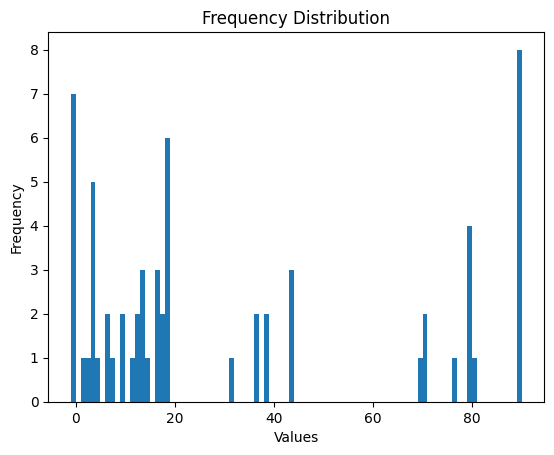

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Your list of numbers
data = listd

# Calculate the histogram
hist, bins = np.histogram(data, bins=np.arange(min(data), max(data)+2)-0.5)

# Plot the histogram
plt.bar(bins[:-1], hist, width=1, align='center')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')
plt.show()

In [3]:
from collections import Counter

# Your list of numbers
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]

# Use Counter to count the frequency of each number
counter = Counter(data)

# Get the frequency orders
frequency_orders = counter.most_common()

# Print the result
for number, frequency in frequency_orders:
    print(f"Number: {number}, Frequency: {frequency}")


Number: 5, Frequency: 5
Number: 4, Frequency: 4
Number: 3, Frequency: 3
Number: 2, Frequency: 2
Number: 1, Frequency: 1
